In [7]:
# In this exercise we want to plot the comparision between demand and median salary of the top 10 job skills for :
# Data Analyst, Data Engineer, Data Scientist

In [8]:
import pandas as pd
from datasets import load_dataset
import numpy as np
import matplotlib.pyplot as plt

data = load_dataset("lukebarousse/data_jobs")
df = data['train'].to_pandas()

df.drop_duplicates()
df['job_posted_date'] = pd.to_datetime(df.job_posted_date)



In [9]:
df.job_title_short.unique() # These are the job titles available in the database

array(['Senior Data Engineer', 'Data Analyst', 'Data Engineer',
       'Business Analyst', 'Data Scientist', 'Machine Learning Engineer',
       'Senior Data Analyst', 'Cloud Engineer', 'Senior Data Scientist',
       'Software Engineer'], dtype=object)

In [10]:
title = ["Data Analyst", "Data Engineer", "Data Scientist"]
tfig = 3  # Enter the total number of job title ex. 4
col = 1   # Enter how many job title plots should be appear in one row

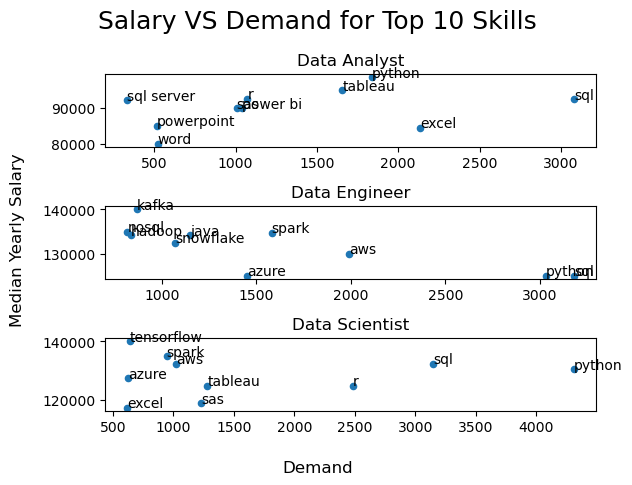

In [11]:
df_og = df.copy()

df.dropna(subset = "job_skills", inplace = True)
df.dropna(subset = "salary_year_avg", inplace = True)

import ast
df['job_skills'] = df.job_skills.apply(lambda sk : ast.literal_eval(sk) if pd.notna(sk) else sk)

df_ex = df.explode("job_skills")

import math
row = math.ceil(tfig/col)

fig, ax = plt.subplots(row,col)
for i,jtitle in enumerate(title) :
    df_plot =(df_ex[df_ex['job_title_short'] == jtitle].
              groupby("job_skills").agg(median_salary = ('salary_year_avg', 'median'), demand = ('job_skills', 'size')).
              sort_values("demand", ascending = False).head(10))
    df_plot.plot(kind = "scatter", x = "demand", y = "median_salary", ax = ax[i])
    for j,sk in enumerate(df_plot.index) : 
        ax[i].text(x = df_plot.demand.iloc[j], y = df_plot.median_salary.iloc[j], s = sk)
    ax[i].set_title(jtitle)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
   

fig.suptitle("Salary VS Demand for Top 10 Skills", fontsize = 18)
fig.supylabel("Median Yearly Salary")
fig.supxlabel("Demand")
fig.tight_layout()
    